TASK 1

In [1]:
import pandas as pd

# import task 1 file
df1 = pd.read_csv("p3_task-1.csv")
df1.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


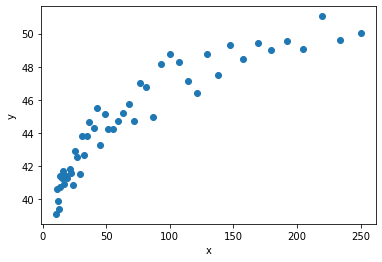

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# identify x & y values
x = df1.x.values
y = df1.y.values

# plot data
plt.scatter(x, y)

# label chart
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
import numpy as np

# define new variable log(x)
df1['log_x'] = np.log(df1['x'])

X = df1.log_x.values

# Fit a linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X[:, np.newaxis], y)

# print coefficients
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [3.390241]
Intercept: 31.52920121929614


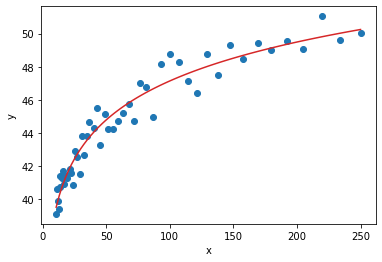

In [4]:
# plot logarithmic curve against original data

# plot original data
plt.scatter(x, y)

# plot logarithmic curve
x_values = np.linspace(min(x), max(x), num=100)
y_values_lr = (lr.coef_*(np.log(x_values)) + lr.intercept_)
plt.plot(x_values, y_values_lr, c="C3")

# label chart
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
# compute RSS 
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

y_pred = lr.predict(X[:, np.newaxis])

print("RSS values:", RSS(y, y_pred))

RSS values: 31.84265175275671


In [6]:
# compute R^2 coefficient
R2 = lr.score(X[:, np.newaxis], y)
print("R2:", R2)

R2: 0.9411567093138288


R^2 score close to one suggests model fits the data significantly better than the mean baseline 

TASK 2

In [7]:
# import task 2 file
df2 = pd.read_csv("p3_task-2.csv")
df2.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [8]:
from sklearn.model_selection import train_test_split

X = df2.drop("y", axis=1).values
y = df2.y.values


# Split data using sklearn function
x_tr, x_te, y_tr, y_te = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0
)

print("Train X Shape:", x_tr.shape)
print("Test X Shape:", x_te.shape)

Train X Shape: (800, 3)
Test X Shape: (200, 3)


In [9]:
# Split data using sklearn function
train_df, test_df = train_test_split(
    df2, train_size=0.8, test_size=0.2, random_state=0
)

print("Train Dataframe Shape:", train_df.shape)
print("Test Dataframe Shape", test_df.shape)

Train Dataframe Shape: (800, 4)
Test Dataframe Shape (200, 4)


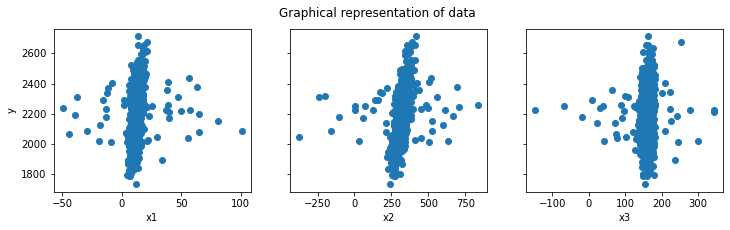

In [10]:
# plot 3 variables to observe outliers
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3), sharey=True)
fig.suptitle("Graphical representation of data")

ax1.scatter(train_df.x1, train_df.y)
ax1.set_xlabel("x1")
ax1.set_ylabel("y")

ax2.scatter(train_df.x2, train_df.y)
ax2.set_xlabel("x2")

ax3.scatter(train_df.x3, train_df.y)
ax3.set_xlabel("x3")

plt.show()

Clearly visible that outliers exist within all 3 variables

In [26]:
# build cleaning strategy to remove outliers

def remove_outliers(df):
    #create 2 copies of dataframe
    df = df.copy()
    df_wo = df.copy()
    
    #create list of variables without y
    variables = df.drop("y", axis=1).columns
    
    # standardise variable columns of first copy to z values
    for c in variables:
        df[c] = (df[c] - df[c].mean()) / df[c].std()
    
    # create filter for any z values that exceed 2
    idx = np.abs(df) > 2
    
    # use filter on second copy to return original values without outliers  
    df_wo[variables] = df_wo.drop("y",axis=1)[~idx]
      
    # add back the y values
    df_wo['y'] = df['y']
    
    #remove rows with outliers
    df_wo = df_wo.dropna()
    
    return df_wo

# create new dataframe with outliers removed
train_df_wo = remove_outliers(train_df)

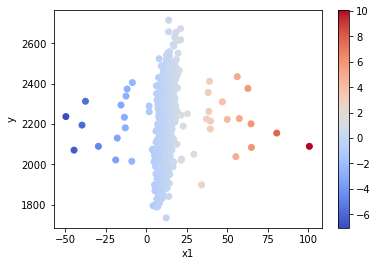

In [27]:
# diagram to show why remove z values above 2

variables = train_df.drop("y", axis=1).columns

z_scores = (train_df['x1'] - train_df['x1'].mean()) / train_df['x1'].std()

plt.scatter(train_df.x1, train_df.y, c=z_scores, cmap="coolwarm")
plt.xlabel("x1")
plt.ylabel("y")
plt.colorbar()
plt.show()

Above diagram confirming that all extreme values have z values greater than 2

In [28]:
# view how many values removed

train_df_wo.dropna().shape

(755, 4)

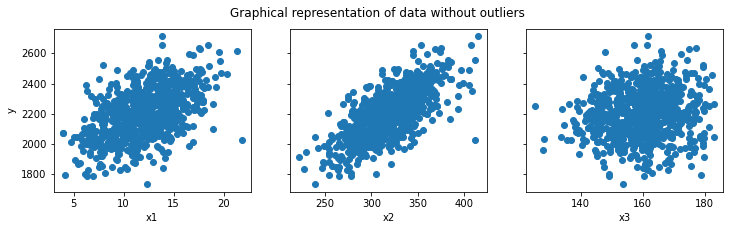

In [29]:
# plot clean data
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3), sharey=True)
fig.suptitle("Graphical representation of data without outliers")

ax1.scatter(train_df_wo.x1, train_df_wo.y)
ax1.set_xlabel("x1")
ax1.set_ylabel("y")

ax2.scatter(train_df_wo.x2, train_df_wo.y)
ax2.set_xlabel("x2")

ax3.scatter(train_df_wo.x3, train_df_wo.y)
ax3.set_xlabel("x3")

plt.show()

Charts now exclude all most extreme results

In [30]:
# define train variables with original data 
X_tr = train_df[variables]
y_tr = train_df.y

# define train variables with outliers omitted
X_tr_wo = train_df_wo[variables]
y_tr_wo = train_df_wo.y

# define test variables
X_te = test_df[variables]
y_te = test_df.y

# import Huber regressor
from sklearn.linear_model import HuberRegressor

# Create a linear regression with Huber loss
lr_huber = HuberRegressor(epsilon=1.35)

# fit linear regressor & compute predictions from test data
lr.fit(X_tr, y_tr)
y_pred_lr = lr.predict(X_te)

# fit Huber regressor
lr_huber.fit(X_tr, y_tr)
y_pred_hr = lr_huber.predict(X_te)

# fit linear regressor without outliers
lr.fit(X_tr_wo, y_tr_wo)
y_pred_lr_wo = lr.predict(X_te)


In [42]:
# definte calculation of Mean absolute error
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

# view and compare the three models MAE vs teh mean baseline
print("MAE mean baseline {}".format(MAE(y_te, np.mean(y_tr))))
print("MAE linear regression with outliers {}".format(MAE(y_te, y_pred_lr)))
print("MAE huber regression {}".format(MAE(y_te, y_pred_hr)))
print("MAE linear regression without outliers {}".format(MAE(y_te, y_pred_lr_wo)))

MAE mean baseline 117.26195640000003
MAE linear regression with outliers 104.78843301492125
MAE huber regression 83.90812400807437
MAE linear regression without outliers 69.30261030814663


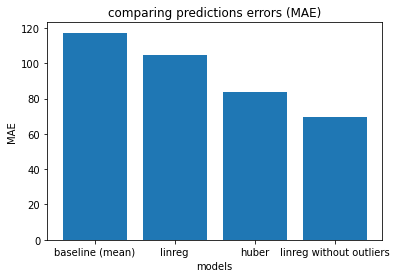

In [44]:
mae_baseline = MAE(y_te, np.mean(y_tr))
mae_lr     = MAE(y_te, y_pred_lr)
mae_huber  = MAE(y_te, y_pred_hr)
mae_lr_wo = MAE(y_te, y_pred_lr_wo)

# bar chart to show comparison
plt.bar([1, 2, 3, 4], [mae_baseline, mae_lr, mae_huber, mae_lr_wo])
plt.xticks([1, 2, 3, 4], ["baseline (mean)", "linreg", "huber", "linreg without outliers"])
plt.title('comparing predictions errors (MAE)')
plt.xlabel('models')
plt.ylabel('MAE')
plt.show()

All models fit data better than the mean baseline. Huber regressor improves the fit, however the best model is the linear regressor without outliers.